In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Analysis%20of%20Banking%20DATA%20model/Bank_churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn= df[df["Exited"] == 1]
not_churn= df[df["Exited"] == 0]
target_col = ["Exited"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [8]:
df['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df[(df['Age']>=50)&(df['EstimatedSalary']>100000)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
41,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
44,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0
76,664,France,Male,55,8,0.00,2,1,1,139161.64,0
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...
9879,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
9897,678,Spain,Female,61,8,0.00,2,1,1,159938.82,0
9917,635,Germany,Male,53,8,117005.55,1,0,1,123646.57,1
9939,693,Spain,Female,57,9,0.00,2,1,1,135502.77,0


In [11]:
df[(df['Gender']=='Female')&(df['Exited']==1)&(df['HasCrCard']==0)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
41,465,France,Female,51,8,122522.32,1,0,0,181297.65,1
43,834,France,Female,49,2,131394.56,1,0,0,194365.76,1
126,549,France,Female,52,1,0.00,1,0,1,8636.05,1
139,579,Spain,Female,35,1,129490.36,2,0,1,8590.83,1
190,715,France,Female,41,8,56214.85,2,0,0,92982.61,1
...,...,...,...,...,...,...,...,...,...,...,...
9747,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9834,516,France,Female,46,6,62212.29,1,0,1,171681.86,1
9884,751,France,Female,48,4,0.00,1,0,1,30165.06,1
9920,678,France,Female,49,3,204510.94,1,0,1,738.88,1


In [12]:
df['Geography'].unique()
Geography_Gender=pd.crosstab(df['Geography'],df['Gender'])
Geography_Gender

Gender,Female,Male
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


In [13]:
df['HasCrCard'].unique()
HasCrCard_Age=pd.crosstab(df['HasCrCard'],df['Age'])
HasCrCard_Age

Age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
HasCrCard,,,,,,,,,,,,,,,,,,,,,
0,8,5,14,15,26,32,41,44,61,62,...,2,1,1,0,1,1,1,0,0,1
1,14,22,26,38,58,67,91,110,139,147,...,3,3,2,4,0,0,1,1,1,1


In [14]:
df['Exited'].unique()
Exited_IsActiveMember=pd.crosstab(df['Exited'],df['IsActiveMember'])
Exited_IsActiveMember

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
df.median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64

In [17]:
df.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

In [18]:
df_grouped_sum=df.groupby('Gender',as_index=False)['EstimatedSalary'].agg('sum').rename(columns={'EstimatedSalary':'EstimatedSalary_Sum'})
df_grouped_cnt=df.groupby('Gender',as_index=False)['EstimatedSalary'].agg('count').rename(columns={'EstimatedSalary':'EstimatedSalary_Cnt'})

df_grouped_Salary=df_grouped_sum.merge(df_grouped_cnt,left_on='Gender',right_on='Gender',how='inner')

df_grouped_Salary.loc[:,'AVG_EstimatedSalary'] = df_grouped_Salary['EstimatedSalary_Sum'] /df_grouped_Salary['EstimatedSalary_Cnt']

df_grouped_Salary.sort_values('EstimatedSalary_Sum',ascending=False)

,Gender,EstimatedSalary_Sum,EstimatedSalary_Cnt,AVG_EstimatedSalary
1,Male,5.438696e+08,5457,99664.576931
0,Female,4.570328e+08,4543,100601.541382


In [19]:
df_grouped_sum=df.groupby('Tenure',as_index=False)['Balance'].agg('sum').rename(columns={'Balance':'Balance_Sum'})
df_grouped_cnt=df.groupby('Tenure',as_index=False)['Balance'].agg('count').rename(columns={'Balance':'Balance_Cnt'})
df_grouped_Balance=df_grouped_sum.merge(df_grouped_cnt,left_on='Tenure',right_on='Tenure',how='inner')

df_grouped_Balance.loc[:,'AVG_Balance'] = df_grouped_Balance['Balance_Sum'] /df_grouped_Balance['Balance_Cnt']

df_grouped_Balance.sort_values('Balance_Sum',ascending=False)

,Tenure,Balance_Sum,Balance_Cnt,AVG_Balance
1,1,81304822.67,1035,78555.384222
2,2,80527928.54,1048,76839.626469
8,8,79885013.21,1025,77936.598254
3,3,78367072.42,1009,77668.059881
7,7,77667080.19,1028,75551.634426
5,5,77361612.23,1012,76444.280860
9,9,75337543.31,984,76562.544014
4,4,73244740.73,989,74059.394065
6,6,71948612.53,967,74403.942637
10,10,36224476.96,490,73927.504000


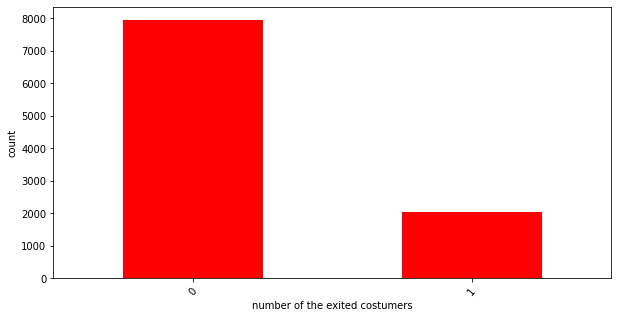

In [20]:
plt.rcParams['figure.figsize']=(10,5)
df['Exited'].value_counts().sort_values(ascending=False).plot.bar(color='red')
plt.xlabel('number of the exited costumers')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

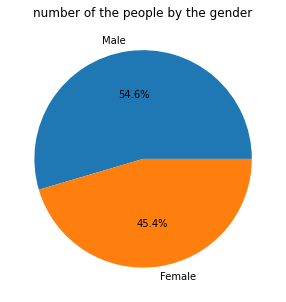

In [21]:
plt.rcParams['figure.figsize']=(10,5)
df['Gender'].value_counts().sort_values(ascending=False).plot.pie(y='Gender',autopct="%0.1f%%")
plt.title('number of the people by the gender')
plt.axis('off')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



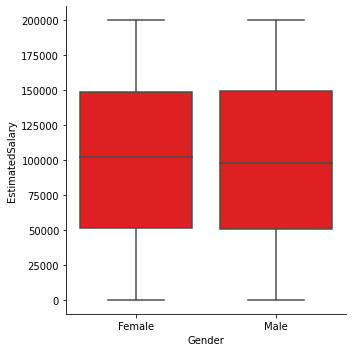

In [22]:
sns.catplot('Gender','EstimatedSalary',data=df,kind='box',color='red')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



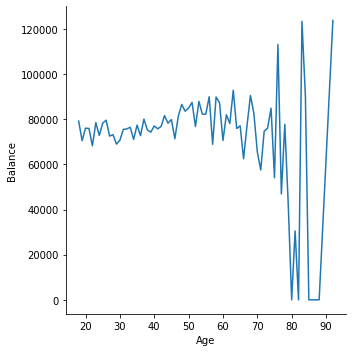

In [23]:
sns.relplot('Age','Balance',data=df, kind='line',ci=None)
plt.show()

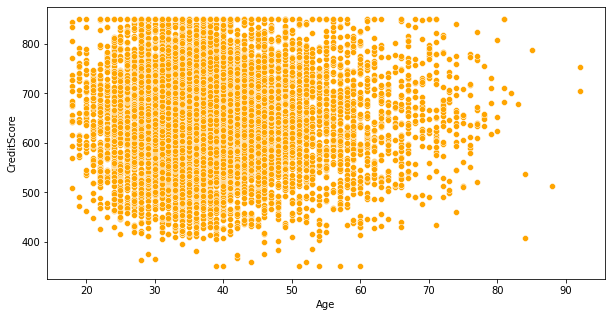

In [24]:
sns.scatterplot(x='Age',y='CreditScore',data=df,color='orange')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



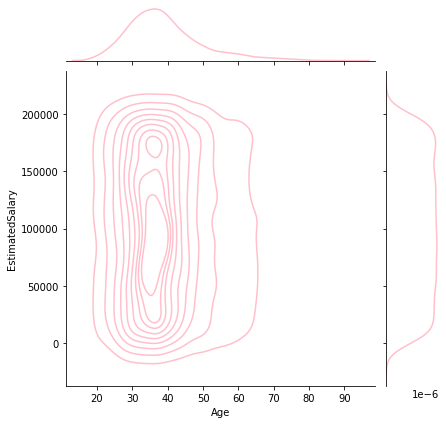

In [25]:
sns.jointplot('Age','EstimatedSalary',data=df,kind='kde',color='pink')
plt.show()

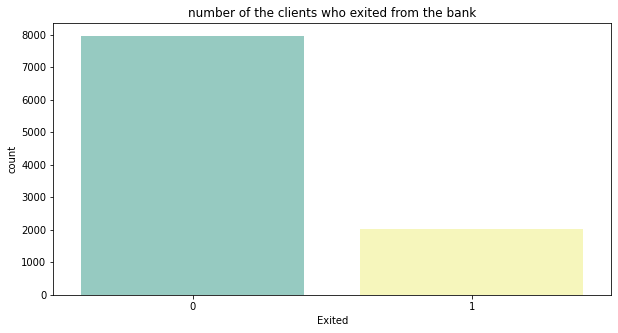

In [26]:
sns.countplot(data=df, x='Exited',palette='Set3')
plt.title('number of the clients who exited from the bank')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



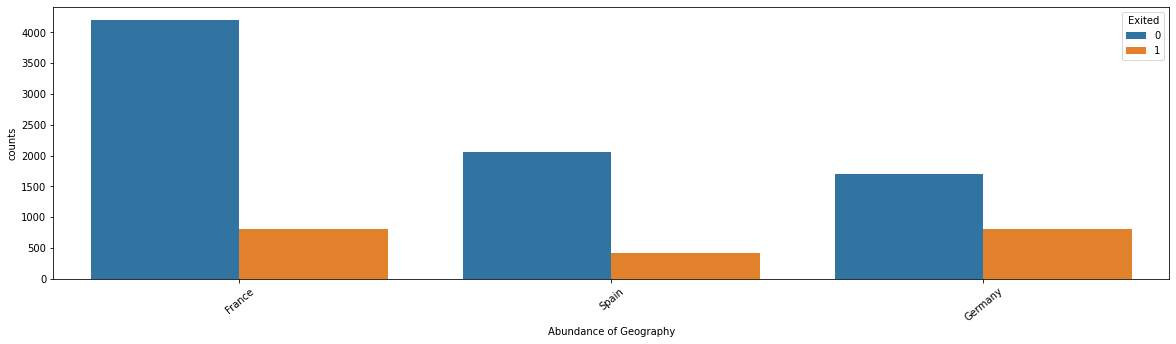

In [27]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(df['Geography'],hue=df['Exited'],ax=ax)
plt.xlabel('Abundance of Geography')
plt.ylabel('counts')
plt.xticks(rotation=40)
plt.show()

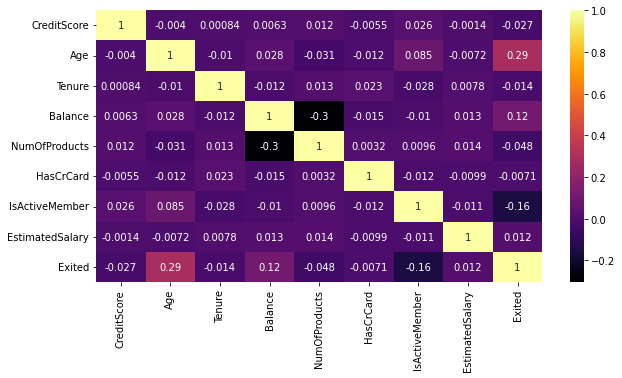

In [28]:
del_corr=df.corr()
f,ax=plt.subplots(figsize=(10,5))

sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

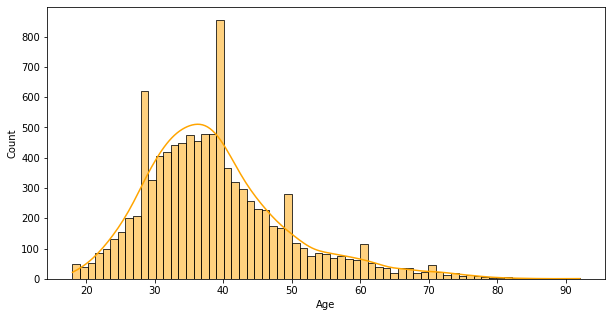

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True,color='orange')

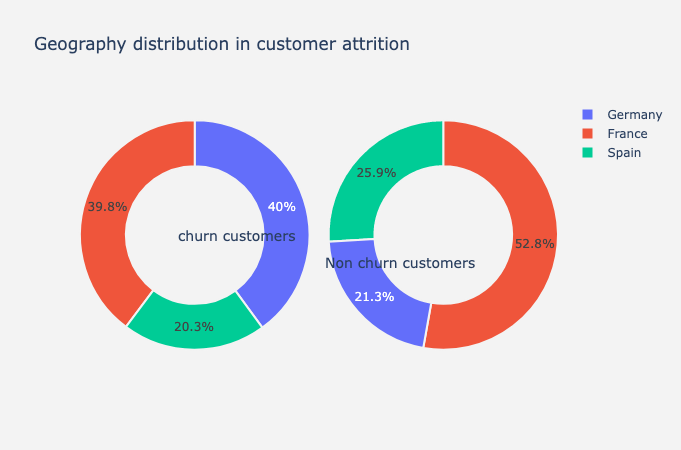

In [30]:
import plotly.tools as tls
def plot_pie(column):
    df1= go.Pie(values=churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   ) 
    
    df2=go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )

    
    
    layout= go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .20, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 14),
                                                showarrow = False,
                                                x = .83,y = .4
                                               )
                                          ]
                           )
                      )
        
    
    df = [df1,df2]
    fig  = go.Figure(data = df,layout = layout)
    py.iplot(fig)
    
    
plot_pie(cat_cols[0])

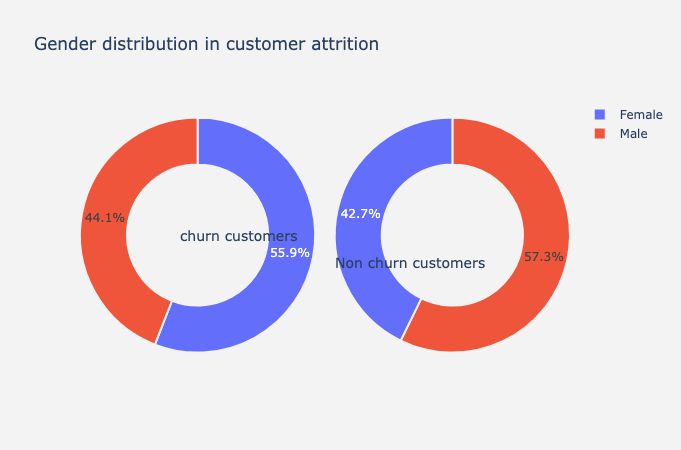

In [31]:
plot_pie(cat_cols[1])

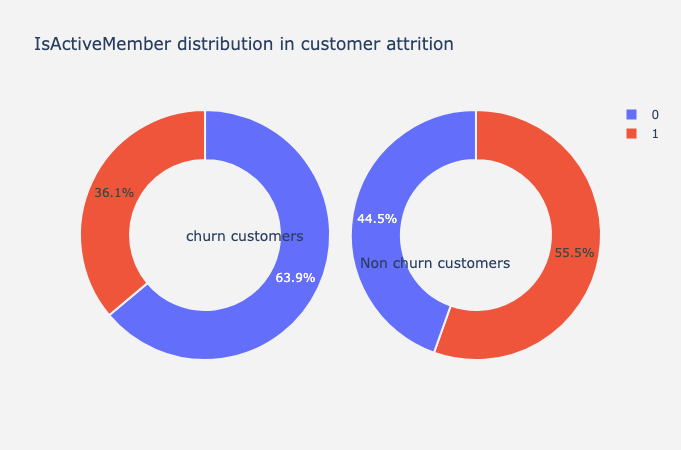

In [32]:
plot_pie(cat_cols[4])

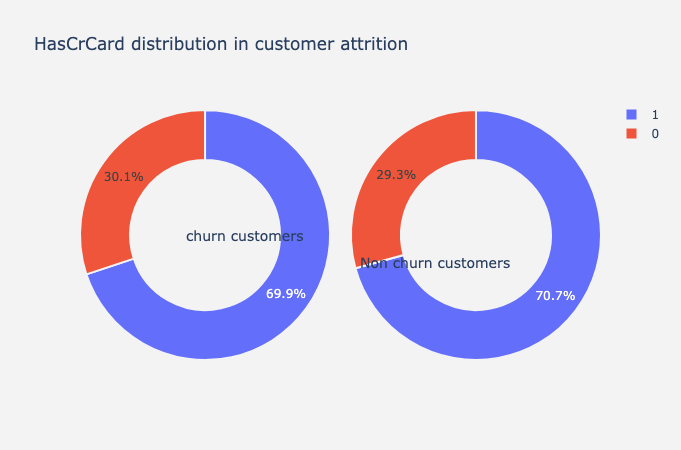

In [33]:
plot_pie(cat_cols[3])

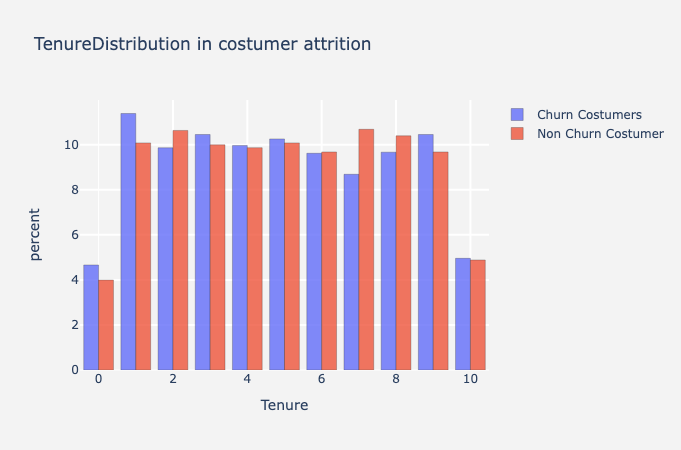

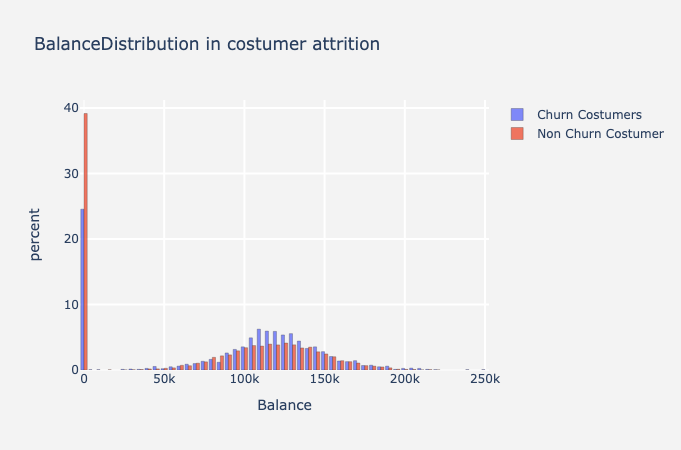

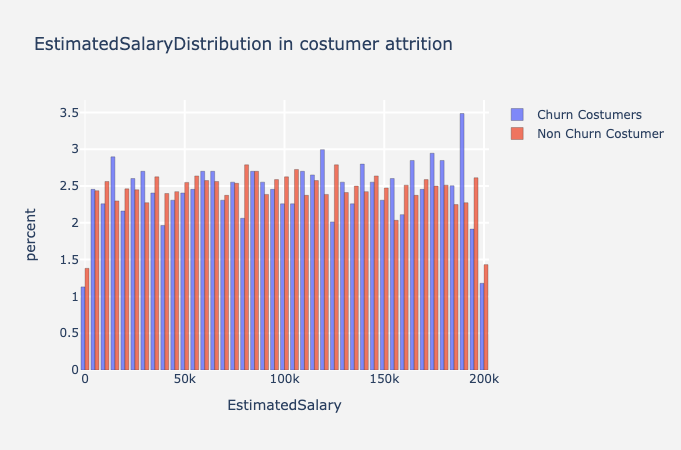

In [34]:
def histogram(column):
    df1=go.Histogram(x=churn[column],
                     name='Churn Costumers',
                     histnorm="percent",
                     marker=dict(line=dict(width=.3,
                                           color='black'
                                          
                                          )
                                ),
                     
                    opacity=.8
                    )
    
    df2=go.Histogram(x=not_churn[column],
                     name="Non Churn Costumer",
                     histnorm="percent",
                     marker=dict(line=dict(width=.3,
                                           color='black'
                                          
                                          )
                                ),
                     opacity=.8
                    )
    data=[df1,df2]
    layout=go.Layout(dict(title=column+"Distribution in costumer attrition",
                          plot_bgcolor="rgb(243,243,243)",
                          paper_bgcolor="rgb(243,243,243)",
                          xaxis=dict(gridcolor="rgb(255,255,255)",
                                     title=column,
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    ),
                          yaxis=dict(gridcolor="rgb(255,255,255)",
                                     title="percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    
                                    ),
                         )
                    )
    fig=go.Figure(data=data,layout=layout)
    py.iplot(fig)

    
histogram(num_cols[2])
histogram(num_cols[3])
histogram(num_cols[4])

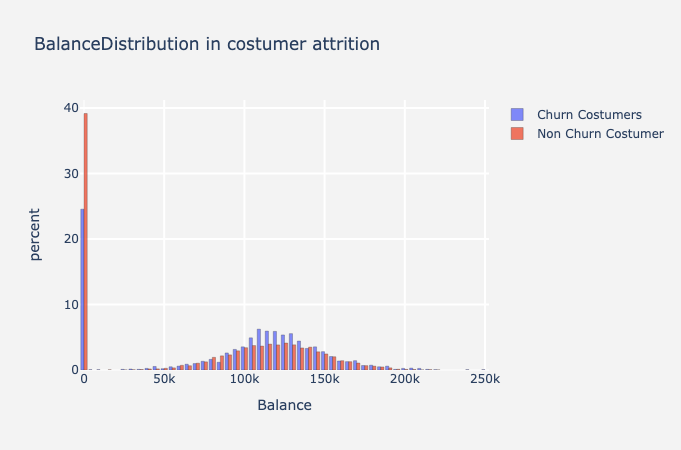

In [35]:
histogram(num_cols[3])

In [36]:
list=['Geography','Gender']
df=pd.get_dummies(df,columns=list,prefix=list)
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
x=df.drop('Exited',axis=1)
y=df.Exited
feature_label=x.columns
model=RandomForestClassifier(n_estimators = 10000)
model.fit(x,y)
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
for i in range (x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, feature_label[i], importances[indices[i]]))

 1) CreditScore                    0.239866
 2) Age                            0.146910
 3) Tenure                         0.144390
 4) Balance                        0.141906
 5) NumOfProducts                  0.128243
 6) HasCrCard                      0.083813
 7) IsActiveMember                 0.039926
 8) EstimatedSalary                0.020818
 9) Geography_France               0.018040
10) Geography_Germany              0.009955
11) Geography_Spain                0.008913
12) Gender_Female                  0.008611
13) Gender_Male                    0.008608


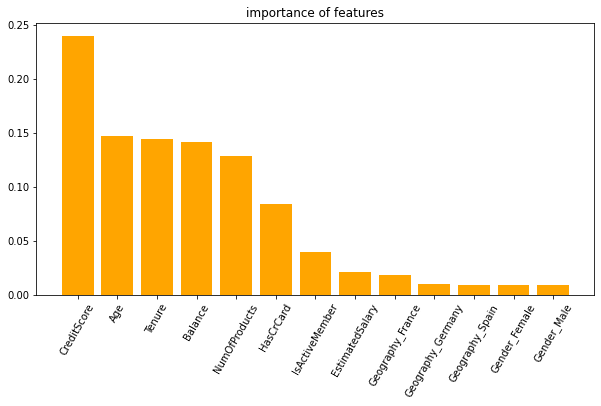

In [38]:
plt.title('importance of features')
plt.bar(range(x.shape[1]),importances[indices],color='orange',align='center')
plt.xticks(range(x.shape[1]),feature_label,rotation=60)
plt.show()